# **DATA PREPARATION**

### 1.1 Pendahuluan

Beberapa tahun terakhir ini baik City Hotel maupun Resort Hotel mengalami peningkatan cukup signifikan dalam pembatalan pemesanan. Akibatnya, kedua kategori hotel tersebut saat ini menghadapi berbagai masalah, seperti pemasukan yang berkurang dan kamar hotel yang kurang terpakai. Oleh karena itu, prioritas utama kedua hotel adalah dengan mengurangi tingkat pembatalan pemesanan, yang akan meningkatkan efisiensi mereka dalam menghasilkan pendapatan. Laporan ini berfokus pada analisis alasan pembatalan pemesanan hotel dan faktor-faktor lain yang tidak secara langsung memengaruhi bisnis dan perolehan pendapatan tahunan mereka.

### 1.2 Sumber Data

Dataset ini didapatkan dari GitHub milik dari Antonio, Almeida and Nunes, 2019. Data dapat diakses pada link berikut https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2020/2020-02-11/hotels.csv


### 1.3 Hotel Booking Dataset

  - Tujuan Data
  
  Tujuan data ini adalah untuk mengeksplorasi dan menganalisis penyebab pembatalan pemesanan hotel serta saran dari penyebab tersebut

  - Variabel Dataset

  Dataset ini terdiri dari 32 variabel, berikut adalah rincian dari setiap variabel :

  

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
|hotel                          |character | Hotel (H1 = Resort Hotel or H2 = City Hotel) |
|is_canceled                    |double    | Value indicating if the booking was canceled (1) or not (0) |
|lead_time                      |double    | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |
|arrival_date_year              |double    | Year of arrival date|
|arrival_date_month             |character | Month of arrival date|
|arrival_date_week_number       |double    | Week number of year for arrival date|
|arrival_date_day_of_month      |double    | Day of arrival date|
|stays_in_weekend_nights        |double    | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
|stays_in_week_nights           |double    |  Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel|
|adults                         |double    | Number of adults|
|children                       |double    | Number of children|
|babies                         |double    |Number of babies |
|meal                           |character | Type of meal booked. Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package;<br>BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner) |
|country                        |character | Country of origin. Categories are represented in the ISO 3155–3:2013 format |
|market_segment                 |character | Market segment designation. In categories, the term "TA" means "Travel Agents" and "TO" means "Tour Operators" |
|distribution_channel           |character | Booking distribution channel. The term "TA" means "Travel Agents" and "TO" means "Tour Operators" |
|is_repeated_guest              |double    | Value indicating if the booking name was from a repeated guest (1) or not (0) |
|previous_cancellations         |double    | Number of previous bookings that were cancelled by the customer prior to the current booking |
|previous_bookings_not_canceled |double    | Number of previous bookings not cancelled by the customer prior to the current booking |
|reserved_room_type             |character | Code of room type reserved. Code is presented instead of designation for anonymity reasons |
|assigned_room_type             |character | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons |
|booking_changes                |double    | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation|
|deposit_type                   |character | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:<br>No Deposit – no deposit was made;<br>Non Refund – a deposit was made in the value of the total stay cost;<br>Refundable – a deposit was made with a value under the total cost of stay. |
|agent                          |character | ID of the travel agency that made the booking |
|company                        |character | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons |
|days_in_waiting_list           |double    | Number of days the booking was in the waiting list before it was confirmed to the customer |
|customer_type                  |character | Type of booking, assuming one of four categories:<br>Contract - when the booking has an allotment or other type of contract associated to it;<br>Group – when the booking is associated to a group;<br>Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;<br>Transient-party – when the booking is transient, but is associated to at least other transient booking|
|adr                            |double    | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights |
|required_car_parking_spaces    |double    | Number of car parking spaces required by the customer |
|total_of_special_requests      |double    | Number of special requests made by the customer (e.g. twin bed or high floor)|
|reservation_status             |character | Reservation last status, assuming one of three categories:<br>Canceled – booking was canceled by the customer;<br>Check-Out – customer has checked in but already departed;<br>No-Show – customer did not check-in and did inform the hotel of the reason why |
|reservation_status_date        |double    | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel|

# => Import Library

mengimpor beberapa library yang diperlukan

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# => Gathering Data

In [98]:
df = pd.read_csv('hotels\hotels.csv')

In [99]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [100]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [101]:
df.shape

(119390, 32)

In [102]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [104]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


# => Assesing Data

mengidentifikasi kualitas seluruh data dan variabel yang masih perlu diperbaiki

In [105]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [106]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [107]:
df.duplicated().sum()

31994

### **OBSERVASI DARI ASSESING DATA**

Setelah dilakukannya assesing data terdapat informasi seperti berikut:

    1. TIPE DATA        ==> Terdapat kesalahan tipe data pada kolom reservation_status_date

    2. MISSING VALUES   ==> Ada 4 variabel yang bernilai null [children, country, agent, company]

    3. DUPLICATE DATA   ==> Tidak terdapat duplikasi data

> Solusi mengatasi tipe data yang kurang tepat

- Tipe data pada kolom **reservation_status_date** perlu diubah menjadi format *datetime*.

> Solusi mengatasi missing value

Berdasarkan informasi diatas terdapat masalah pada kolom **children**, **country**, **agent**, dan **company**. Pada kolom-kolom tersebut terdapat missing value atau Nan-value. Menggunakan tiga metode untuk mengatasi missing value, meliputi *dropping*, *imputation*, dan *interpolation*. Teknik ***Dropout*** akan dilakukan dikarenakan sebagai berikut:
- **Jumlah Data yang Hilang Sedikit**: Karena hanya sedikit yang memiliki nilai NaN, menghapusnya tidak akan mengurangi banyak data dan kemungkinan besar tidak akan mempengaruhi analisis.
- **Kehilangan Data Tidak Signifikan**: Data pada baris-baris yang hilang tidak mengandung informasi yang krusial, penghapusan baris akan lebih mudah dan lebih cepat daripada melakukan imputation yang berpotensi memperkenalkan bias.
- **Variabel tidak relevan**:
Karena variabel agent dan company tidak relevan pada variabel pembatalan pemesanan maka variabel tersebut akan di drop

> Solusi mengatasi duplikasi data

- dilakukan dropping data, agar tidak terjadi redudansi

# => Cleaning Data

In [108]:
df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'])

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [110]:
df.drop(['company','agent'], axis =1, inplace = True)
df.dropna(inplace =True)

In [111]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [112]:
df.drop_duplicates(inplace=True)

In [113]:
df.duplicated().sum()

0

In [114]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914
mean,0.275939,80.202741,2016.211842,26.841694,15.818453,1.007548,2.628955,1.878604,0.139253,0.010815,0.039246,0.030237,0.176761,0.271912,0.753722,106.580816,0.083473,0.699542,2016-08-31 15:53:48.543157760
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,12.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000,2016-03-19 00:00:00
50%,0.000000,50.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.410000,0.000000,0.000000,2016-09-08 00:00:00
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000,2017-03-06 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.446989,86.102902,0.685989,13.654113,8.834539,1.028821,2.043860,0.625881,0.456848,0.113510,0.194180,0.369629,1.718139,0.728177,10.043309,54.959600,0.280440,0.831880,NaN


# **EXPLORATORY DATA ANALYSIS**
**Storyboard:** Mengidentifikasi Alasan Pembatalan Pemesanan Hotel

Hotel adalah termasuk komponen penting dalam sektor pariwisata. Dari banyaknya angka reservasi yang terjadi setiap tahun, dan pada data ini memberikan wawasan untuk mengidektifikasi pola pemesanan dan pembatalan hotel di berbagai negara. Melalui sistem reservasi hotel dan laporan pelanggan, kita dapat menganalisis tren alasan pembatalan pemesanan. Dataset ini menyajikan berbagai informasi mengenai faktor-faktor seperti waktu pemesanan, kebiasaan pelanggan, segmentasi pelanggan, dll. Setelah mengeksplorasi data ini, kita akan menemukan pola serta faktor utama yang berdampak pada keputusan pelanggan untuk membatalkan pesanan hotel.

In [115]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914
mean,0.275939,80.202741,2016.211842,26.841694,15.818453,1.007548,2.628955,1.878604,0.139253,0.010815,0.039246,0.030237,0.176761,0.271912,0.753722,106.580816,0.083473,0.699542,2016-08-31 15:53:48.543157760
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,12.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000,2016-03-19 00:00:00
50%,0.000000,50.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.410000,0.000000,0.000000,2016-09-08 00:00:00
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000,2017-03-06 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.446989,86.102902,0.685989,13.654113,8.834539,1.028821,2.043860,0.625881,0.456848,0.113510,0.194180,0.369629,1.718139,0.728177,10.043309,54.959600,0.280440,0.831880,NaN


Dari kesimpulan data di atas didapat bahwa pada variabel adr memiliki rata-rata 106.580816 dan standard deviasi sebesar 54.959600

## Pertanyaan 1: Berapa total reservasi yang diterima dan dibatalkan?

is_canceled
0    62931
1    23983
Name: count, dtype: int64


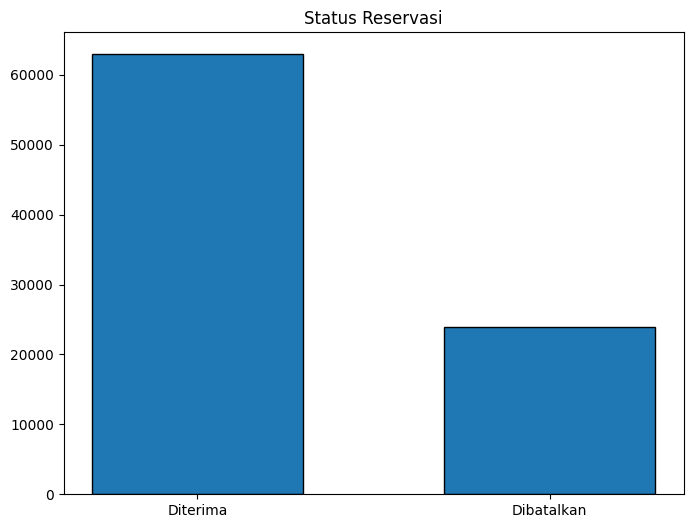

In [116]:
cancelled_perc = df['is_canceled'].value_counts()
print(cancelled_perc)

plt.figure(figsize = (8, 6),facecolor="white")
plt.title('Status Reservasi')
plt.bar(['Diterima' , 'Dibatalkan'],df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.6)
plt.show()

#### Berdasarkan pada grafik perbandingan di atas didapat bahwa total pemesanan sebanyak 62931 diterima dan 23983 dibatalkan.

## Pertanyaan 2: Berapa banyak pesanan yang diterima dan dibatalkan dari setiap kategori hotel?

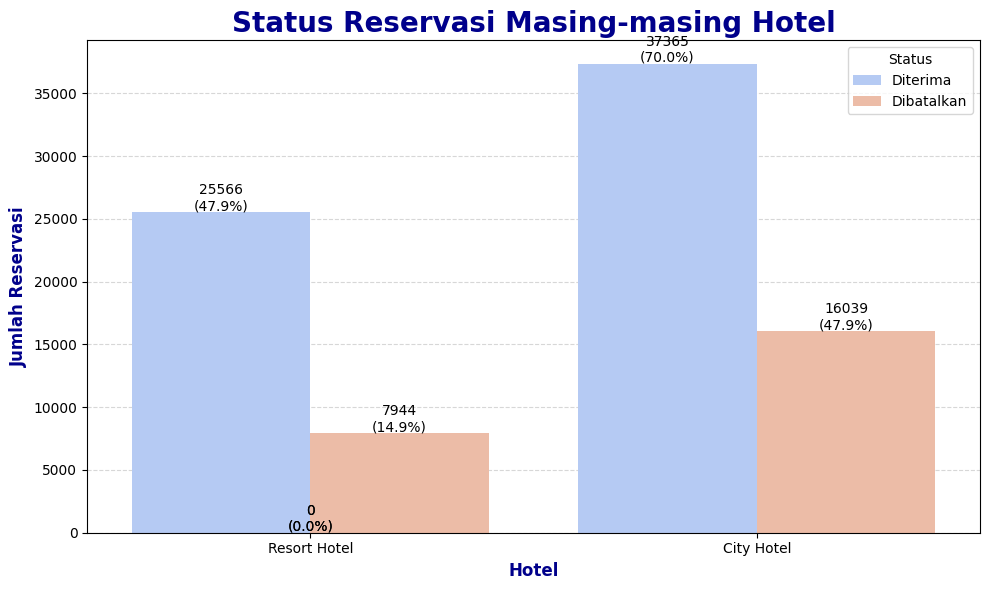

In [117]:
# Set background warna figure
plt.figure(figsize=(10, 6), facecolor='white')

# Buat countplot dengan palet warna modern
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette="coolwarm")

# Tambahkan judul dan label
plt.title('Status Reservasi Masing-masing Hotel', size=20, weight='bold', color='darkblue')
plt.xlabel('Hotel', color='darkblue', fontsize=12, weight='bold')
plt.ylabel('Jumlah Reservasi', color='darkblue', fontsize=12, weight='bold')

# Custom legenda dengan lokasi baru dan label
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Diterima', 'Dibatalkan'], title='Status', loc='upper right', fontsize=10)

# Tambahkan grid horizontal untuk panduan visual
ax1.yaxis.grid(True, linestyle='--', alpha=0.5)
ax1.set_axisbelow(True)

# Anotasi bar dengan jumlah dan persentase
total_counts = df.groupby('hotel').size()
for p in ax1.patches:
    height = p.get_height()
    hotel = p.get_x()
    total = total_counts.iloc[int(hotel)]
    percent = height / total * 100
    ax1.annotate(f'{int(height)}\n({percent:.1f}%)',
                 (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='center', xytext=(0, 10),
                 textcoords='offset points', fontsize=10, color='black')

# Tampilkan plot
plt.tight_layout()
plt.show()

#### Berdasarkan hasil perbandingan masing-masing hotel di atas, didapatkan bahwa City Hotel memiliki reservasi lebih banyak serta pembatalan reservasi yang lebih tinggi, hal ini mungkin disebabkan karena Hotel Resort lebih mahal daripada Hotel City.

## Pertanyaan 3: Top 10 negara mana saja yang sering terjadi pembatalan reservasi?

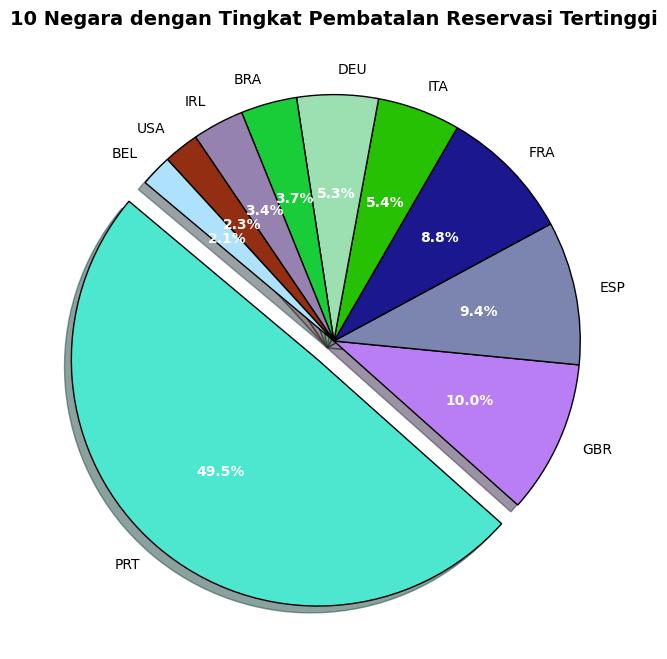

In [118]:
import random

# Data untuk pie chart
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]

# Membuat warna acak untuk setiap slice
colors = [f"#{random.randint(0, 0xFFFFFF):06x}" for _ in range(len(top_10_country))]

# Menentukan slice terbesar untuk di-explode
explode = [0.1 if i == 0 else 0 for i in range(len(top_10_country))]  # Highlight slice pertama

# Membuat pie chart
plt.figure(figsize=(10, 8), facecolor='white')
plt.title('10 Negara dengan Tingkat Pembatalan Reservasi Tertinggi', color="black", fontsize=14, weight='bold')
wedges, texts, autotexts = plt.pie(
    top_10_country,
    labels=top_10_country.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    colors=colors,
    shadow=True,
    wedgeprops={'edgecolor': 'black'}
)

# Styling teks
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

# Menampilkan hasil
plt.show()

#### Berdasarkan visualisasi di atas didapatkan bahwa:

1. Portugal, memiliki jumlah pembatalan terbanyak yaitu 49.5% dari total 10 negara teratas
2. United Kingdom of Great Britain and Northern Ireland, memiliki jumlah pembatalan pemesanan yaitu 10.0% dari total 10 negara teratas
3. Spain, memiliki jumlah pembatalan yaitu 9.4% dari total 10 negara teratas
4. France, memiliki jumlah pembatalan yaitu 8.8% dari total 10 negara teratas
5. Italy, memiliki jumlah pembatalan yaitu 5.4% dari total 10 negara teratas

## Pertanyaan 4: Bagaimana dampak lead time terhadap pembatalan pemesanan?

In [119]:
canceled = df[df['is_canceled'] == 1]
not_canceled = df[df['is_canceled'] == 0]

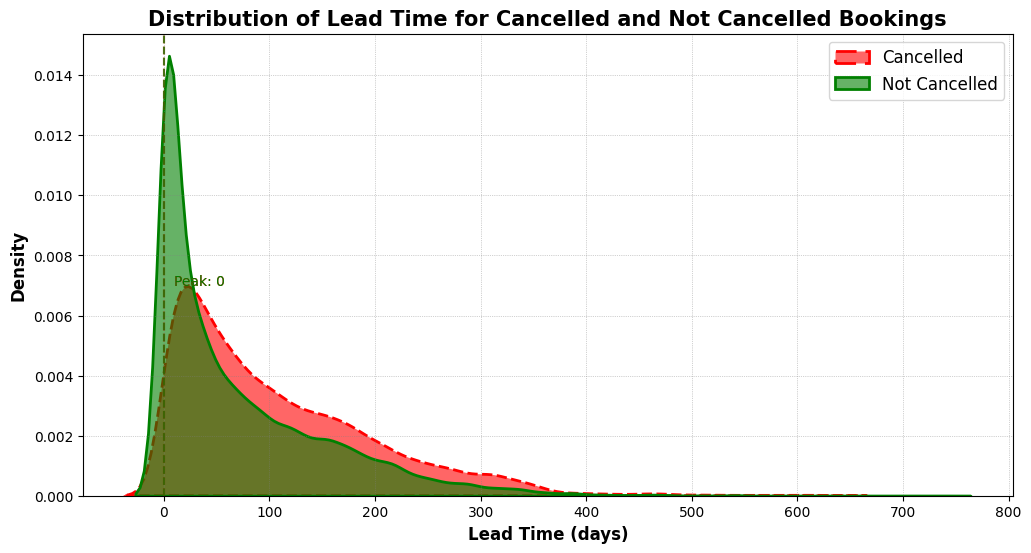

In [120]:
# Data Lead Time
canceled = df[df['is_canceled'] == 1]
not_canceled = df[df['is_canceled'] == 0]

# Membuat Grafik Distribusi
plt.figure(figsize=(12, 6), facecolor='white')

# Distribusi data yang dibatalkan
sns.kdeplot(
    canceled['lead_time'],
    label='Cancelled',
    color='red',
    shade=True,
    alpha=0.6,
    linewidth=2,
    linestyle='--'
)

# Distribusi data yang diterima
sns.kdeplot(
    not_canceled['lead_time'],
    label='Not Cancelled',
    color='green',
    shade=True,
    alpha=0.6,
    linewidth=2
)

# Menambahkan Puncak Annotasi
cancelled_peak = canceled['lead_time'].mode()[0]
not_cancelled_peak = not_canceled['lead_time'].mode()[0]
plt.axvline(cancelled_peak, color='red', linestyle='--', alpha=0.7)
plt.axvline(not_cancelled_peak, color='green', linestyle='--', alpha=0.7)
plt.text(cancelled_peak + 10, 0.007, f'Peak: {cancelled_peak}', color='red', fontsize=10)
plt.text(not_cancelled_peak + 10, 0.007, f'Peak: {not_cancelled_peak}', color='green', fontsize=10)

# Menambahkan Gaya Visual
plt.title('Distribution of Lead Time for Cancelled and Not Cancelled Bookings', size=15, weight='bold')
plt.xlabel('Lead Time (days)', size=12, weight='bold')
plt.ylabel('Density', size=12, weight='bold')
plt.legend(fontsize=12, loc='upper right')
plt.grid(color='gray', linestyle=':', linewidth=0.5, alpha=0.7)

# Menampilkan Plot
plt.show()

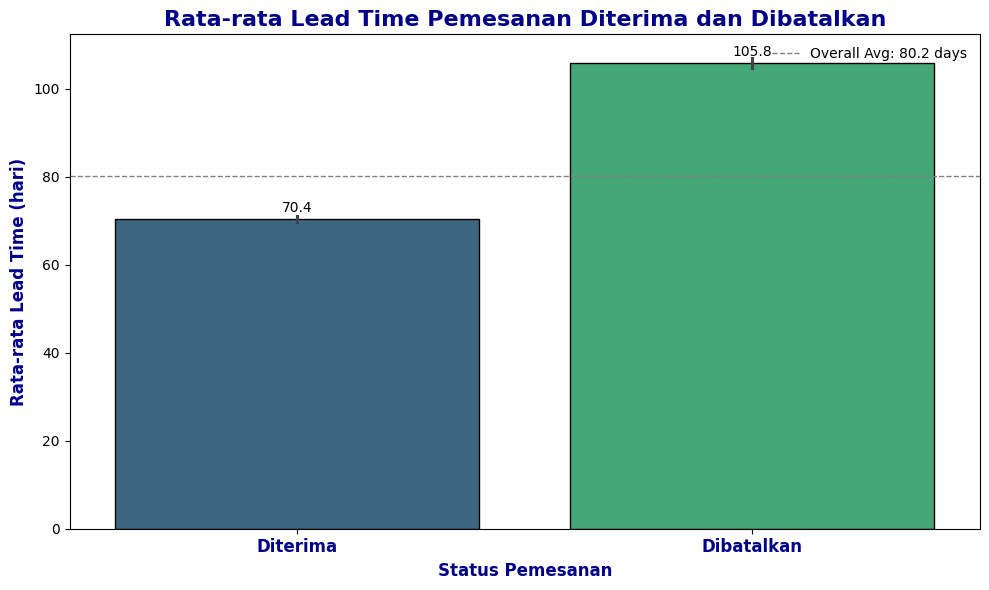

In [121]:
# Membuat visualisasi Lead Time Rata-rata
plt.figure(figsize=(10, 6), facecolor='white')
barplot = sns.barplot(
    x='is_canceled', 
    y='lead_time', 
    data=df, 
    palette=sns.color_palette("viridis", 2),  # Gradasi warna modern
    edgecolor='black'
)

# Tambahkan garis rata-rata keseluruhan
overall_avg = df['lead_time'].mean()
plt.axhline(overall_avg, color='gray', linestyle='--', linewidth=1, label=f'Overall Avg: {overall_avg:.1f} days')

# Anotasi nilai rata-rata pada batang
for p in barplot.patches:
    barplot.annotate(
        f'{p.get_height():.1f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', xytext=(0, 8),
        textcoords='offset points', fontsize=10, color='black'
    )

# Menambahkan Judul dan Label
plt.title('Rata-rata Lead Time Pemesanan Diterima dan Dibatalkan', size=16, weight='bold', color='darkblue')
plt.xticks([0, 1], ['Diterima', 'Dibatalkan'], fontsize=12, weight='bold', color='darkblue')
plt.xlabel('Status Pemesanan', size=12, weight='bold', color='darkblue')
plt.ylabel('Rata-rata Lead Time (hari)', size=12, weight='bold', color='darkblue')

# Menambahkan legenda
plt.legend(loc='upper right', fontsize=10, frameon=False)

# Tampilkan plot
plt.tight_layout()
plt.show()

In [122]:
# Output Rata-rata Lead Time
avg_lead_time_cancelled = canceled['lead_time'].mean()
avg_lead_time_not_cancelled = not_canceled['lead_time'].mean()
print(f"Rata-rata Lead Time Pemesanan yang Dibatalkan: {avg_lead_time_cancelled:.2f} hari")
print(f"Rata-rata Lead Time Pemesanan yang Diterima: {avg_lead_time_not_cancelled:.2f} hari")

Rata-rata Lead Time Pemesanan yang Dibatalkan: 105.82 hari
Rata-rata Lead Time Pemesanan yang Diterima: 70.44 hari


#### Berdasarkan visualisasi di atas didapatkan bahwa pemesanan dengan lead time lebih panjang cenderung memiliki potensi lebih besar untuk dibatalkan dan pemesanan dengan lead time pendek memiliki potensi lebih kecil untuk dibatalkan. Terlihat dari rata-rata lead time lebih tinggi pada pemesanan yang dibatalkan (105.82 hari) dibandingkan dengan yang tidak dibatalkan (70.44 hari).

## Pertanyaan 5: Berapa Tarif Bulanan Rata-rata di masing-masing hotel?

In [123]:
resort_hotel= df[df['hotel']=='Resort Hotel']
City_Hotel = df[df['hotel']== 'City Hotel']

resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
City_Hotel = City_Hotel.groupby('reservation_status_date')[['adr']].mean()

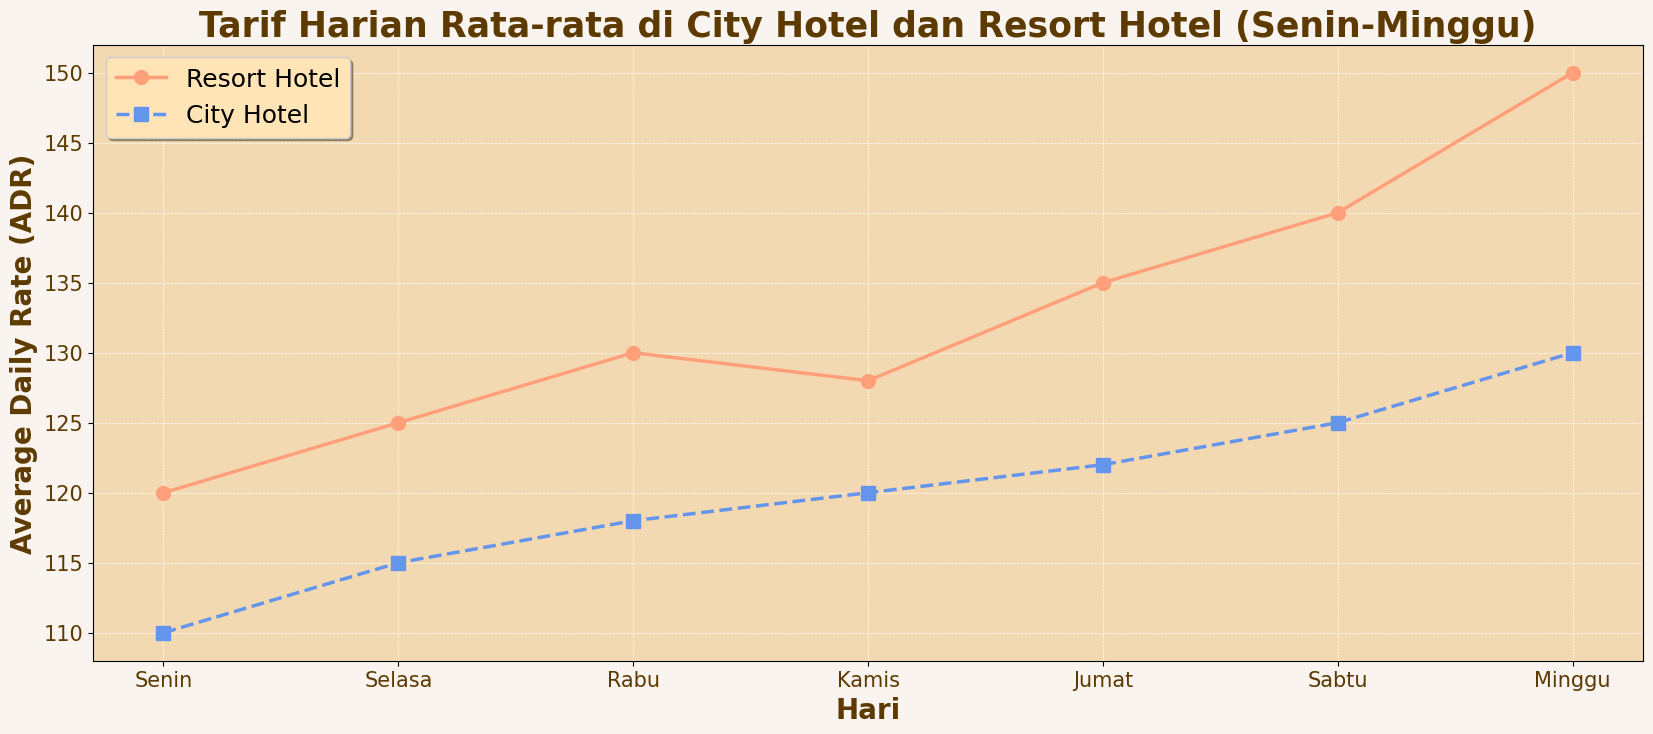

In [129]:
# Contoh Data dengan Hari Senin hingga Minggu
days = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
resort_hotel = pd.DataFrame({'adr': [120, 125, 130, 128, 135, 140, 150]}, index=days)
City_Hotel = pd.DataFrame({'adr': [110, 115, 118, 120, 122, 125, 130]}, index=days)

# Variatif Grafik untuk Hari Mingguan
plt.figure(figsize=(20, 8), facecolor='#F9F4EF')
plt.title('Tarif Harian Rata-rata di City Hotel dan Resort Hotel (Senin-Minggu)', 
          fontsize=25, weight='bold', color='#5D3A00')

# Gradient Background
plt.gca().set_facecolor('#F3D9B1')
plt.grid(color='white', linestyle='--', linewidth=0.5)

# Plot Resort Hotel
plt.plot(
    resort_hotel.index,
    resort_hotel['adr'],
    label='Resort Hotel',
    linestyle='-',
    linewidth=2.5,
    marker='o',
    markersize=10,
    color='#FFA07A'
)

# Plot City Hotel
plt.plot(
    City_Hotel.index,
    City_Hotel['adr'],
    label='City Hotel',
    linestyle='--',
    linewidth=2.5,
    marker='s',
    markersize=10,
    color='#6495ED'
)

# Labels, Legend, and Customization
plt.xlabel('Hari', fontsize=20, weight='bold', color='#5D3A00')
plt.ylabel('Average Daily Rate (ADR)', fontsize=20, weight='bold', color='#5D3A00')
plt.xticks(fontsize=15, color='#5D3A00')  # Tampilkan nama hari di sumbu X
plt.yticks(fontsize=15, color='#5D3A00')
plt.legend(fontsize=18, loc='upper left', frameon=True, shadow=True, facecolor='#FFE4B5')

# Display Plot
plt.show()

#### Berdasarkan grafik di atas menunjukkan bahwa pada hari-hari tertentu rata-rata tarif harian untuk city hotel lebih rendah dari rata-rata tarif harian Resort hotel. Berpotensi bahwa tarif Resort hotel meningkat pada akhir pekan dan hari libur.

## Pertanyaan 6: Berapa distribusi status reservasi pada tiap-tiap bulan serta status pembatalan pemesanan?

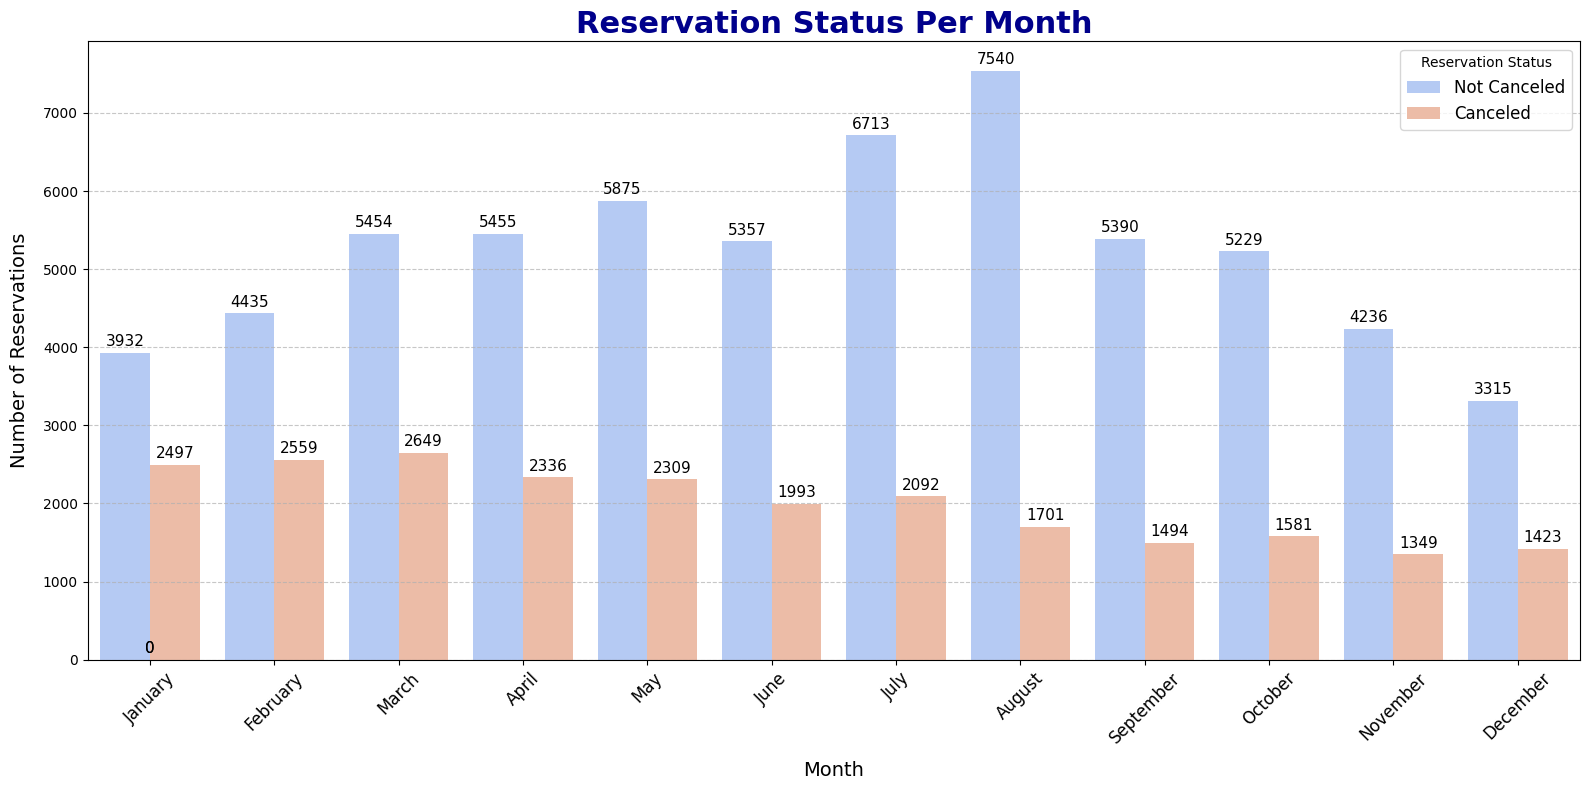

In [133]:
import calendar
# Mengubah angka bulan menjadi nama bulan
df['month'] = df['reservation_status_date'].dt.month

# Membuat palet warna kustom
palette = sns.color_palette("coolwarm", n_colors=2)

# Membuat plot
plt.figure(figsize=(16, 8), facecolor='white')
ax = sns.countplot(x='month', hue='is_canceled', data=df, palette=palette)

# Menambahkan anotasi di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=11, color='black', 
                xytext=(0, 8), textcoords='offset points')

# Menambahkan nama bulan pada sumbu x
ax.set_xticks(range(12))
ax.set_xticklabels([calendar.month_name[i] for i in range(1, 13)], rotation=45, fontsize=12)

# Menyesuaikan judul dan label
plt.title('Reservation Status Per Month', fontsize=22, weight='bold', color='darkblue')
plt.xlabel('Month', fontsize=14, labelpad=10)
plt.ylabel('Number of Reservations', fontsize=14, labelpad=10)

# Menyesuaikan legenda
legend_labels, _ = ax.get_legend_handles_labels()
plt.legend(legend_labels, ['Not Canceled', 'Canceled'], title='Reservation Status', fontsize=12)

# Menambahkan grid untuk mempercantik
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan grafik
plt.tight_layout()
plt.show()


#### Berdasarkan grafik di atas yang dikelompokkan berdasarkan bulan, terlihat bahwa bulan Agustus tertinggi, dengan jumlah reservasi diterima tertinggi dan pembatalan relatif sedikit. Sedangkan, bulan Januari memiliki reservasi diterima paling sedikit namun jumlah reservasi yang dibatalkan tertinggi.

## Pertanyaan 7: Berapa pendapatan (ADR) setiap bulan?

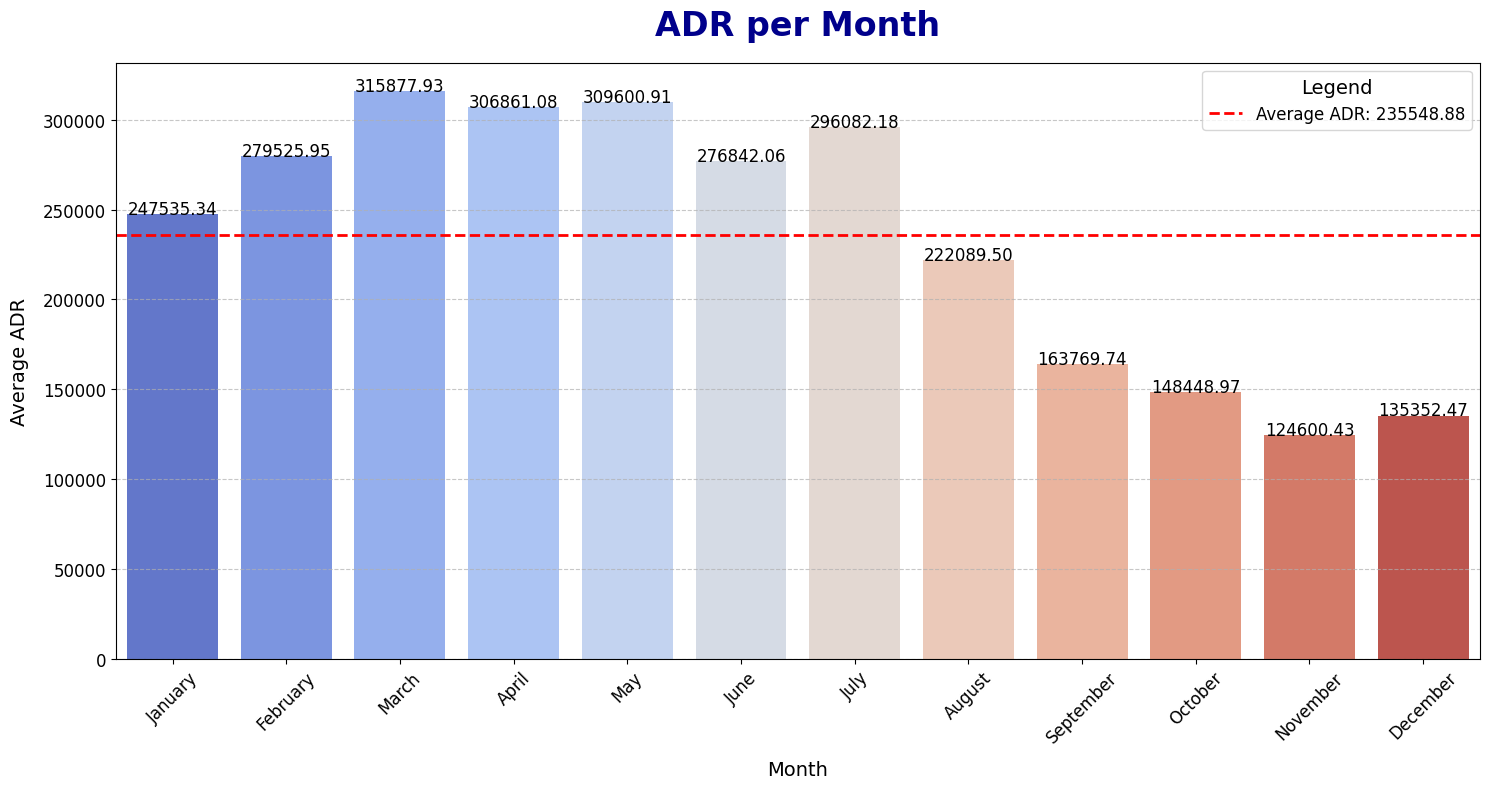

In [134]:
import calendar

# Mengolah data
data = df[df['is_canceled'] == 1].groupby('month')['adr'].sum().reset_index()

# Menambahkan nama bulan
data['month'] = data['month'].apply(lambda x: calendar.month_name[x])

# Membuat plot
plt.figure(figsize=(15, 8))
sns.barplot(x='month', y='adr', data=data, palette="coolwarm")

# Menambahkan anotasi di atas batang
for index, row in data.iterrows():
    plt.text(index, row['adr'] + 5, f'{row["adr"]:.2f}', 
             color='black', ha='center', fontsize=12)

# Menyesuaikan tampilan
plt.title('ADR per Month', fontsize=24, weight='bold', color='darkblue', pad=20)
plt.xlabel('Month', fontsize=14, labelpad=10)
plt.ylabel('Average ADR', fontsize=14, labelpad=10)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan garis horizontal untuk rata-rata
average_adr = data['adr'].mean()
plt.axhline(average_adr, color='red', linestyle='--', linewidth=2, label=f'Average ADR: {average_adr:.2f}')

# Menyesuaikan legenda
plt.legend(title='Legend', fontsize=12, title_fontsize=14, loc='upper right')

# Menampilkan plot
plt.tight_layout()
plt.show()

#### Berdasarkan grafik di atas menunjukkan bahwa pembatalan paling sering terjadi ketika harga sedang tinggi dan paling jarang terjadi ketika harga sedang rendah. Oleh karena itu, harga untuk akomodasi menjadi alasan utama yang mempengaruhi terjadinya pembatalan pemesanan.

# **Hasil dan Kesimpulan**

- Harga yang lebih tinggi menjadi alasan utama tingkat pembatalan yang lebih besar. Untuk mensiasatinya, hotel perlu menyesuaikan harga dengan menawarkan tarif yang lebih terjangkau di lokasi tertentu serta memberikan promo diskon kepada pelanggan.

- Tingkat pembatalan tertinggi dialami oleh Resort Hotel. Oleh karena itu, sebaiknya memberikan penawaran dengan sistem diskon harga kamar yang lebih kompetitif pada akhir pekan dan hari libur.

- Pada bulan Januari, tingkat pembatalan cenderung meningkat signifikan. Maka dari itu, Hotel dapat melakukan promosi pemasaran dengan memberikan penawaran khusus untuk menarik pelanggan dan meningkatkan pendapatan.